# Employee Attrition Prediction Using ML
***

Importing the python libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)

## Importing data

In [4]:
df=pd.read_csv('1000000 HRA Records.csv')

## Data
This dataset is created by IBM data scientists.This includes records on which employees ended up attritioning and which didn't .We can use this information to construct an ML model to predict the attrition of an employee by the process called training.After training the model, we can pass the information of an arbitrary employee (the same information that we used to train the model) to the model, and have the model predict whether this employee is attritioning.

The dataset we use is publicly available.The dataset has (1000000R X 37C) that contains numeric and categorical data types describing each employee’s background and characteristics; and labelled (supervised learning) with whether they are still in the company or whether they have gone to work somewhere else. Machine Learning models can help to understand and determine how these factors relate to workforce attrition. 

In [5]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,No,Travel_Frequently,200,Hardware,13,5,Life Sciences,1,1,1,Male,33,4,5,Sales Executive,4,Married,17288,224744,6,Y,No,34,2,2,80,4,40,3,4,31,28,1,29
1,18,Yes,Travel_Rarely,720,Sales,34,2,Technical Degree,1,2,1,Female,50,1,1,Research Scientist,3,Single,50885,1221240,2,Y,Yes,18,4,1,80,3,25,5,3,8,5,4,8
2,25,No,Non-Travel,1406,Support,3,2,Life Sciences,1,3,2,Female,198,2,4,Human Resources,2,Divorced,16049,224686,5,Y,Yes,48,1,3,80,4,13,2,3,5,1,1,3
3,38,Yes,Travel_Frequently,1316,Software,19,5,Other,1,4,4,Male,38,3,2,Manager,3,Single,50758,1268950,3,Y,Yes,12,4,4,80,3,29,5,4,5,3,1,1
4,35,No,Travel_Rarely,711,Research & Development,28,4,Technical Degree,1,5,3,Male,90,1,5,Research Scientist,1,Single,41000,615000,6,Y,Yes,47,4,4,80,3,1,1,4,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,19,Yes,Travel_Rarely,389,Sales,22,1,Human Resources,1,999996,2,Male,122,1,3,Healthcare Representative,3,Married,30138,241104,0,Y,No,48,3,2,80,2,12,5,1,8,1,6,2
999996,24,No,Non-Travel,1248,Hardware,7,5,Life Sciences,1,999997,2,Male,187,3,1,Developer,2,Divorced,39771,1073817,0,Y,No,42,2,4,80,3,32,2,3,1,1,1,1
999997,55,No,Non-Travel,1298,Support,33,5,Human Resources,1,999998,1,Female,142,1,3,Sales Executive,3,Single,19790,316640,5,Y,No,26,3,4,80,1,29,4,4,28,19,16,26
999998,44,Yes,Non-Travel,1065,Research & Development,34,3,Human Resources,1,999999,4,Female,102,2,1,Healthcare Representative,3,Married,9736,48680,7,Y,Yes,25,3,3,80,4,20,2,3,2,2,1,2


In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,No,Travel_Frequently,200,Hardware,13,5,Life Sciences,1,1,1,Male,33,4,5,Sales Executive,4,Married,17288,224744,6,Y,No,34,2,2,80,4,40,3,4,31,28,1,29
1,18,Yes,Travel_Rarely,720,Sales,34,2,Technical Degree,1,2,1,Female,50,1,1,Research Scientist,3,Single,50885,1221240,2,Y,Yes,18,4,1,80,3,25,5,3,8,5,4,8
2,25,No,Non-Travel,1406,Support,3,2,Life Sciences,1,3,2,Female,198,2,4,Human Resources,2,Divorced,16049,224686,5,Y,Yes,48,1,3,80,4,13,2,3,5,1,1,3
3,38,Yes,Travel_Frequently,1316,Software,19,5,Other,1,4,4,Male,38,3,2,Manager,3,Single,50758,1268950,3,Y,Yes,12,4,4,80,3,29,5,4,5,3,1,1
4,35,No,Travel_Rarely,711,Research & Development,28,4,Technical Degree,1,5,3,Male,90,1,5,Research Scientist,1,Single,41000,615000,6,Y,Yes,47,4,4,80,3,1,1,4,1,1,1,1


In [7]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
999995,19,Yes,Travel_Rarely,389,Sales,22,1,Human Resources,1,999996,2,Male,122,1,3,Healthcare Representative,3,Married,30138,241104,0,Y,No,48,3,2,80,2,12,5,1,8,1,6,2
999996,24,No,Non-Travel,1248,Hardware,7,5,Life Sciences,1,999997,2,Male,187,3,1,Developer,2,Divorced,39771,1073817,0,Y,No,42,2,4,80,3,32,2,3,1,1,1,1
999997,55,No,Non-Travel,1298,Support,33,5,Human Resources,1,999998,1,Female,142,1,3,Sales Executive,3,Single,19790,316640,5,Y,No,26,3,4,80,1,29,4,4,28,19,16,26
999998,44,Yes,Non-Travel,1065,Research & Development,34,3,Human Resources,1,999999,4,Female,102,2,1,Healthcare Representative,3,Married,9736,48680,7,Y,Yes,25,3,3,80,4,20,2,3,2,2,1,2
999999,19,Yes,Non-Travel,776,Research & Development,23,4,Human Resources,1,1000000,1,Female,189,3,1,Research Director,2,Divorced,41602,249612,1,Y,Yes,31,3,1,80,1,31,2,3,29,20,22,7


In [8]:
print(df.shape)
print(df.size)

(1000000, 35)
35000000


### This dataset consist of 1000000 rows and 35 columns.The description about each attribute is:

* BusinessTravel - Business travel is travel undertaken for work or business purposes.
* DailyRate - the prescribed amount of pay for a given job of work paid for by the day or hour.
* Department - It shows to which department an employee belongs to.
* Education - It specifies number of years of education completed.
* EducationField - It shows to which education field an employee belongs to.
* EnvironmentSatisfaction - Numerical Value - satisfaction with the environment.
* HourlyRate - it shows hourly salary.
* JobInvolvement - A person who has a high level of job involvement usually obtains major life satisfaction from the job.1 indicates low and 4 indicates high 
* JobLevel - categories with different titles and salary ranges within a workplace.
* JobRole - It simply defines the job position.
* JobSatisfaction - A feeling of fulfilment or enjoyment that a employee derives from their job.
* MonthlyIncome - Amount paid to an employee within a month.
* MonthlyRate - The internal charge out rate which will be used to calculate the cost of each employee monthly, in general, the monthly rate will cover salary, social insurance, administration, logistics, over head etc.
* MonthlyIncome - Monthly income is just how much the employee earned monthly.
* NumCompaniesWorked - Number of companies an employee worked or experience an employee had.
* OverTime - it simply defines an over time work done by an employee.
* PercentSalaryHike - (New salary - Old salary) * 100 / (Old salary).
* PerformanceRating - It observes the worker's performance and records a value.
* StockOptionLevel - It is issued by the company for its employees to encourage employee ownership in the company. The shares of the companies are given to the employees at discounted rates.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 35 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   Age                       1000000 non-null  int64 
 1   Attrition                 1000000 non-null  object
 2   BusinessTravel            1000000 non-null  object
 3   DailyRate                 1000000 non-null  int64 
 4   Department                1000000 non-null  object
 5   DistanceFromHome          1000000 non-null  int64 
 6   Education                 1000000 non-null  int64 
 7   EducationField            1000000 non-null  object
 8   EmployeeCount             1000000 non-null  int64 
 9   EmployeeNumber            1000000 non-null  int64 
 10  EnvironmentSatisfaction   1000000 non-null  int64 
 11  Gender                    1000000 non-null  object
 12  HourlyRate                1000000 non-null  int64 
 13  JobInvolvement            1000000 non-null 

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
df.nunique()

Age                              43
Attrition                         2
BusinessTravel                    3
DailyRate                      1401
Department                        6
DistanceFromHome                 50
Education                         5
EducationField                    6
EmployeeCount                     1
EmployeeNumber              1000000
EnvironmentSatisfaction           4
Gender                            2
HourlyRate                      171
JobInvolvement                    4
JobLevel                          5
JobRole                          10
JobSatisfaction                   4
MaritalStatus                     3
MonthlyIncome                 50000
MonthlyRate                  442523
NumCompaniesWorked                9
Over18                            1
OverTime                          2
PercentSalaryHike                50
PerformanceRating                 4
RelationshipSatisfaction          4
StandardHours                     1
StockOptionLevel            

### Unique values of each column

In [12]:
for cols in df.columns:
    print(cols)
    print(df[cols].unique())
    print(df[cols].nunique())
    print('-------------------------------------------------------------------------------------------------------------')
    

Age
[58 18 25 38 35 23 43 37 34 20 48 42 33 32 30 31 26 54 44 55 59 60 40 46
 36 27 21 56 53 24 47 49 45 19 29 22 51 57 50 41 28 52 39]
43
-------------------------------------------------------------------------------------------------------------
Attrition
['No' 'Yes']
2
-------------------------------------------------------------------------------------------------------------
BusinessTravel
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
3
-------------------------------------------------------------------------------------------------------------
DailyRate
[ 200  720 1406 ... 1150  764 1425]
1401
-------------------------------------------------------------------------------------------------------------
Department
['Hardware' 'Sales' 'Support' 'Software' 'Research & Development'
 'Human Resources']
6
-------------------------------------------------------------------------------------------------------------
DistanceFromHome
[13 34  3 19 28 26  6 16 41 10 11 24  2 38 22 39 25

In [13]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [14]:
df.dtypes[df.dtypes==object]

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object

### Checking null values

In [15]:
[feature for feature in df if df[feature].isnull().sum()>0]

[]

Observation:There is no null value.

### Checking for duplicates

In [16]:
df.duplicated().sum()

0

Observation:There are no duplicates

### Descriptive statistics for categorical analysis

In [17]:
for i in df.columns:
    if(df.dtypes[i]=="object"):
        print(i)
        print(df[i].value_counts())
        print()

Attrition
No     500081
Yes    499919
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        333773
Non-Travel           333205
Travel_Frequently    333022
Name: BusinessTravel, dtype: int64

Department
Hardware                  167090
Software                  166974
Sales                     166743
Research & Development    166679
Human Resources           166420
Support                   166094
Name: Department, dtype: int64

EducationField
Medical             167094
Life Sciences       167000
Technical Degree    166634
Human Resources     166562
Other               166431
Marketing           166279
Name: EducationField, dtype: int64

Gender
Female    500073
Male      499927
Name: Gender, dtype: int64

JobRole
Human Resources              100503
Developer                    100194
Manufacturing Director       100110
Sales Representative         100043
Sales Executive               99986
Healthcare Representative     99881
Laboratory Technician         99863
Research Scie

In [18]:
df['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [5]:
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})

### Checking for unique values in each numeric features

In [20]:
for cols in df.columns:
    if df[cols].dtypes!='object':
        print(cols)
        print(df[cols].unique())
        print(df[cols].nunique())
        print('-------------------------------------------------------------------------------------------------------------')
        

Age
[58 18 25 38 35 23 43 37 34 20 48 42 33 32 30 31 26 54 44 55 59 60 40 46
 36 27 21 56 53 24 47 49 45 19 29 22 51 57 50 41 28 52 39]
43
-------------------------------------------------------------------------------------------------------------
Attrition
[0 1]
2
-------------------------------------------------------------------------------------------------------------
DailyRate
[ 200  720 1406 ... 1150  764 1425]
1401
-------------------------------------------------------------------------------------------------------------
DistanceFromHome
[13 34  3 19 28 26  6 16 41 10 11 24  2 38 22 39 25 33 20 29  9  5 43 40
 50  7 14 17  8 35 48 12  1 18 30 45 42 15 27 23 31 44 49 47 32 37 46 36
  4 21]
50
-------------------------------------------------------------------------------------------------------------
Education
[5 2 4 1 3]
5
-------------------------------------------------------------------------------------------------------------
EmployeeCount
[1]
1
------------------------

Dropping the feature "EmployeeNumber" because it seems unimportant as it contain unique value for each row. 

In [6]:
df.drop('EmployeeNumber',axis=1,inplace=True)

In [22]:
for col in df.columns:
    if df[col].dtypes!=object:
        print("{}:{}".format(col,df[col].unique()[:30]))
        print(df[col].nunique())
        print("---------------------------------------------------------------------------------------------------")

Age:[58 18 25 38 35 23 43 37 34 20 48 42 33 32 30 31 26 54 44 55 59 60 40 46
 36 27 21 56 53 24]
43
---------------------------------------------------------------------------------------------------
Attrition:[0 1]
2
---------------------------------------------------------------------------------------------------
DailyRate:[ 200  720 1406 1316  711  224 1091 1077  788 1199  593  184  436  595
 1165 1097 1144  884 1462 1015  261 1188  496  693 1127 1373  942 1009
 1148  892]
1401
---------------------------------------------------------------------------------------------------
DistanceFromHome:[13 34  3 19 28 26  6 16 41 10 11 24  2 38 22 39 25 33 20 29  9  5 43 40
 50  7 14 17  8 35]
50
---------------------------------------------------------------------------------------------------
Education:[5 2 4 1 3]
5
---------------------------------------------------------------------------------------------------
EmployeeCount:[1]
1
--------------------------------------------------------

### Checking for unique values in each categorical features

In [23]:
for col in df.columns:
    if df[col].dtypes==object:
        print("{}:{}".format(col,df[col].unique()[:30]))
        print(df[col].nunique())
        print("---------------------------------------------------------------------------------------------------")

BusinessTravel:['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
3
---------------------------------------------------------------------------------------------------
Department:['Hardware' 'Sales' 'Support' 'Software' 'Research & Development'
 'Human Resources']
6
---------------------------------------------------------------------------------------------------
EducationField:['Life Sciences' 'Technical Degree' 'Other' 'Marketing' 'Medical'
 'Human Resources']
6
---------------------------------------------------------------------------------------------------
Gender:['Male' 'Female']
2
---------------------------------------------------------------------------------------------------
JobRole:['Sales Executive' 'Research Scientist' 'Human Resources' 'Manager'
 'Healthcare Representative' 'Research Director' 'Developer'
 'Sales Representative' 'Laboratory Technician' 'Manufacturing Director']
10
-----------------------------------------------------------------------------------------

Observation:From the above output it seems that all the employees are above 18,so this field does not add any value.

In [7]:
df.drop('Over18',axis=1,inplace=True)

## UNIVARIATE ANALYSIS

In [25]:
#mean,median,mode,min,max,quantiles
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,38.976191,0.499919,799.498643,25.506090,2.999455,1.0,2.501423,115.018539,2.500662,3.000049,2.502119,25985.638494,4.027673e+05,3.994971,24.501936,2.49968,2.499601,80.0,2.501783,20.495472,3.499094,2.501216,10.758434,5.881553,5.874653,5.878886
std,12.403615,0.500000,404.493606,14.423455,1.413818,0.0,1.117929,49.354764,1.117825,1.414944,1.118409,14439.061316,3.411499e+05,2.582375,14.427649,1.11839,1.117010,0.0,1.118162,11.541989,1.706879,1.117466,8.914784,6.017230,6.001467,6.016144
min,18.000000,0.000000,100.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1000.000000,1.002000e+03,0.000000,0.000000,1.00000,1.000000,80.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,28.000000,0.000000,449.000000,13.000000,2.000000,1.0,2.000000,72.000000,2.000000,2.000000,2.000000,13470.000000,1.210860e+05,2.000000,12.000000,1.00000,2.000000,80.0,2.000000,10.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,39.000000,0.000000,799.000000,25.000000,3.000000,1.0,3.000000,115.000000,3.000000,3.000000,3.000000,25984.000000,3.060540e+05,4.000000,24.000000,2.00000,2.000000,80.0,3.000000,21.000000,3.000000,3.000000,8.000000,4.000000,4.000000,4.000000
75%,50.000000,1.000000,1150.000000,38.000000,4.000000,1.0,4.000000,158.000000,4.000000,4.000000,4.000000,38502.000000,6.090000e+05,6.000000,37.000000,4.00000,3.000000,80.0,4.000000,30.000000,5.000000,3.000000,16.000000,8.000000,8.000000,8.000000
max,60.000000,1.000000,1500.000000,50.000000,5.000000,1.0,4.000000,200.000000,4.000000,5.000000,4.000000,50999.000000,1.529970e+06,8.000000,49.000000,4.00000,4.000000,80.0,4.000000,40.000000,6.000000,4.000000,40.000000,40.000000,40.000000,40.000000


### Graphical Representation Of Numerical Data Distribution

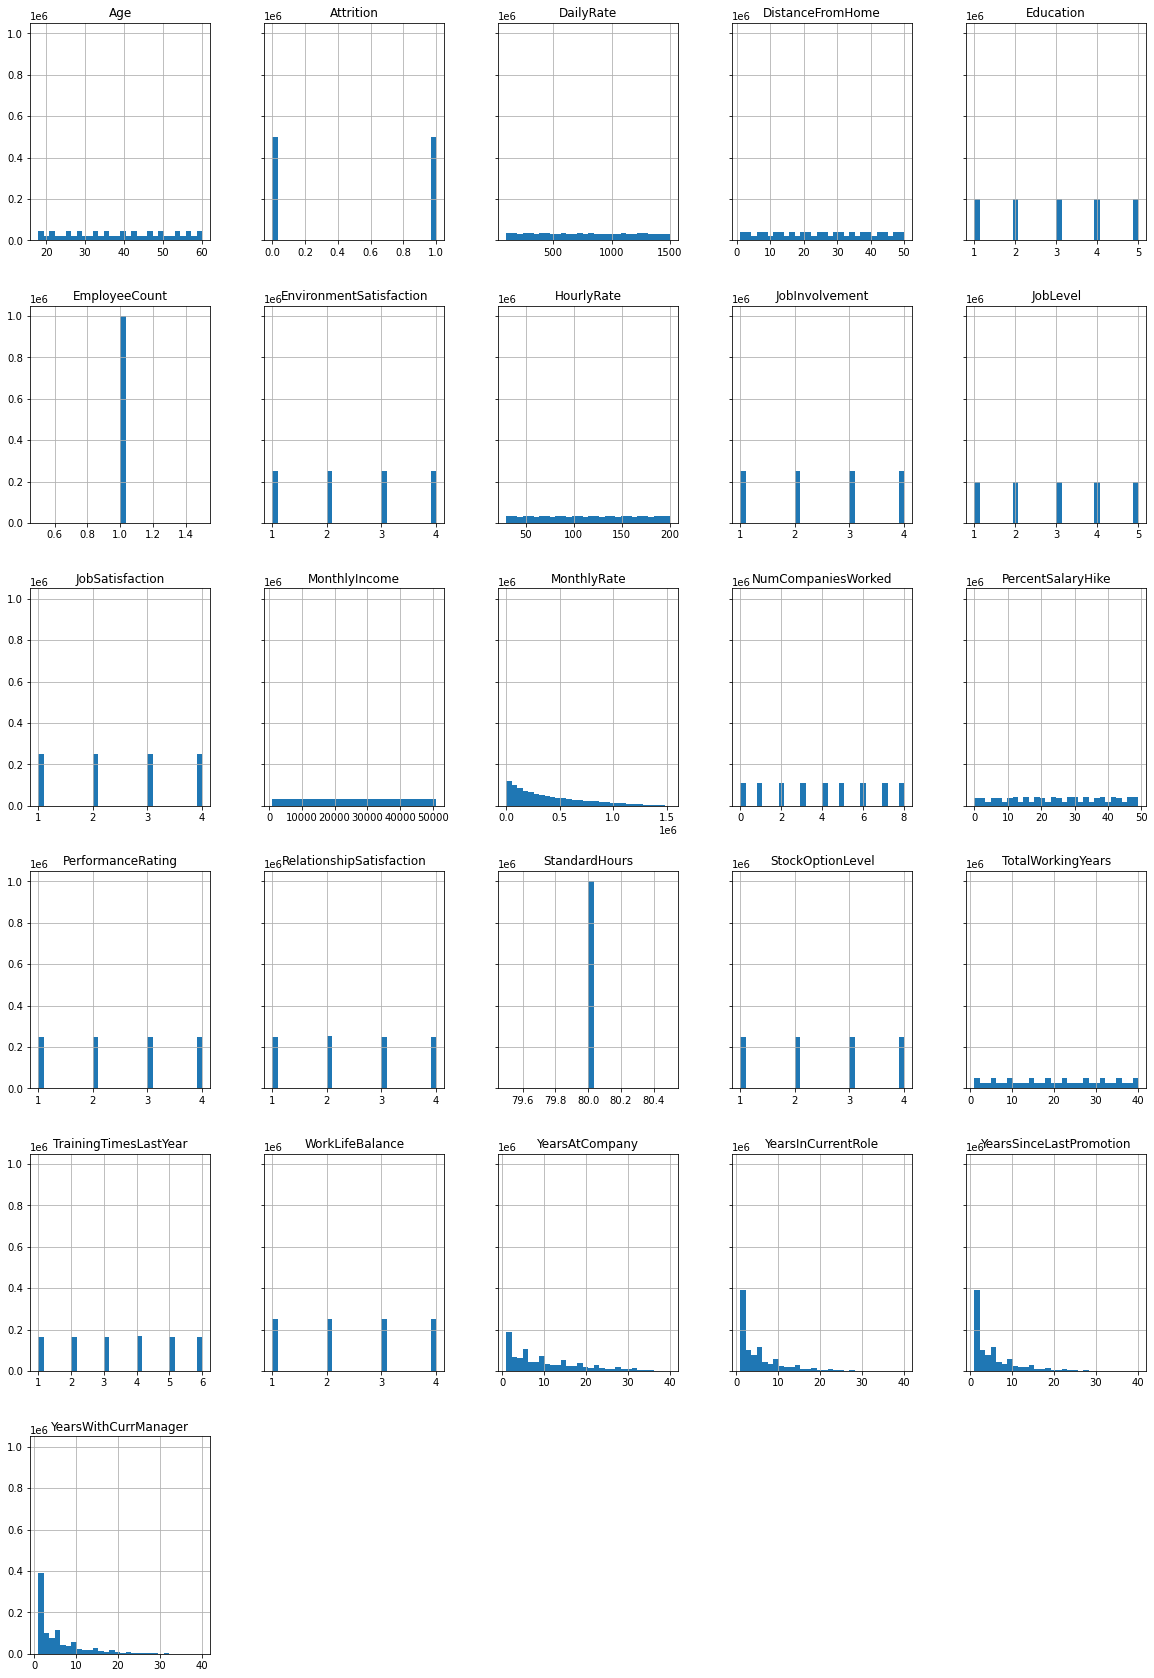

In [26]:
hist = df.hist(bins=30, sharey=True, figsize=(20, 30))

### Comment:
The standard deviation of the columns('EmployeeCount' and 'StandardHours') is zero so they adds no value we can drop them.

In [8]:
df.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

In [28]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,58,0,Travel_Frequently,200,Hardware,13,5,Life Sciences,1,Male,33,4,5,Sales Executive,4,Married,17288,224744,6,No,34,2,2,4,40,3,4,31,28,1,29
1,18,1,Travel_Rarely,720,Sales,34,2,Technical Degree,1,Female,50,1,1,Research Scientist,3,Single,50885,1221240,2,Yes,18,4,1,3,25,5,3,8,5,4,8
2,25,0,Non-Travel,1406,Support,3,2,Life Sciences,2,Female,198,2,4,Human Resources,2,Divorced,16049,224686,5,Yes,48,1,3,4,13,2,3,5,1,1,3
3,38,1,Travel_Frequently,1316,Software,19,5,Other,4,Male,38,3,2,Manager,3,Single,50758,1268950,3,Yes,12,4,4,3,29,5,4,5,3,1,1
4,35,0,Travel_Rarely,711,Research & Development,28,4,Technical Degree,3,Male,90,1,5,Research Scientist,1,Single,41000,615000,6,Yes,47,4,4,3,1,1,4,1,1,1,1


### Analysis of the employee attrition using countplot

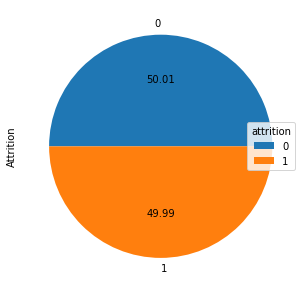

In [29]:
plt.figure(figsize=[5,10])
df['Attrition'].value_counts().plot(kind="pie", autopct="%.2f")
plt.legend(title='attrition',loc=5)

Observation:
* 49.99% of employee ended up attritioning.
* 50.01% of employee didn't.

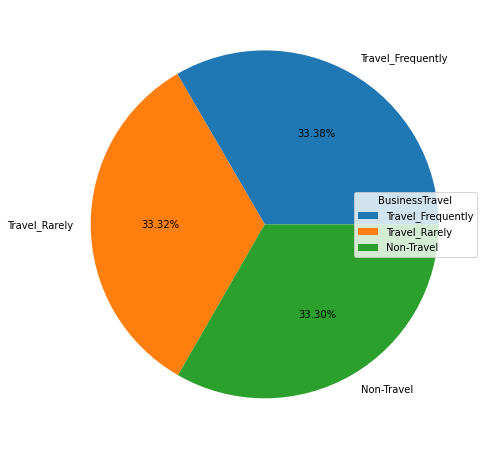

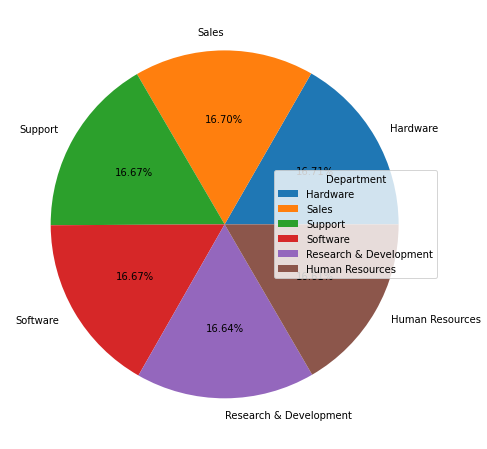

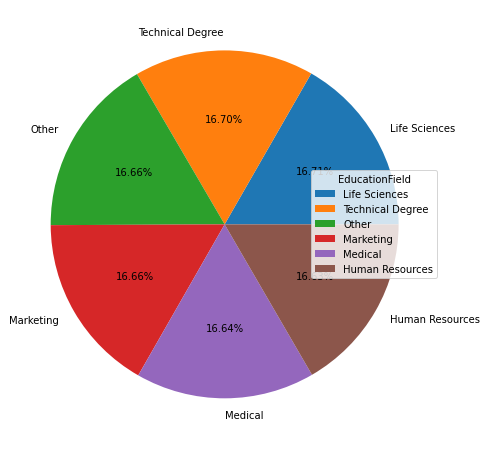

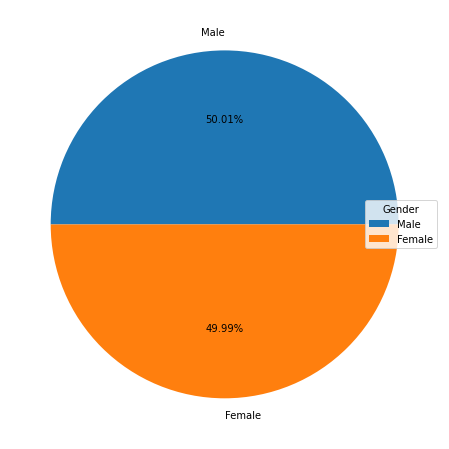

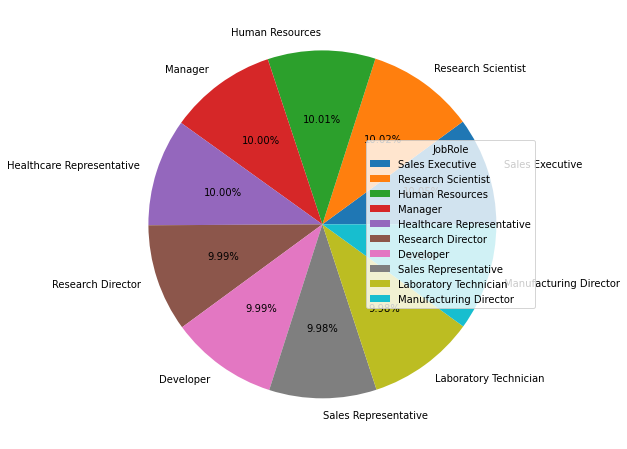

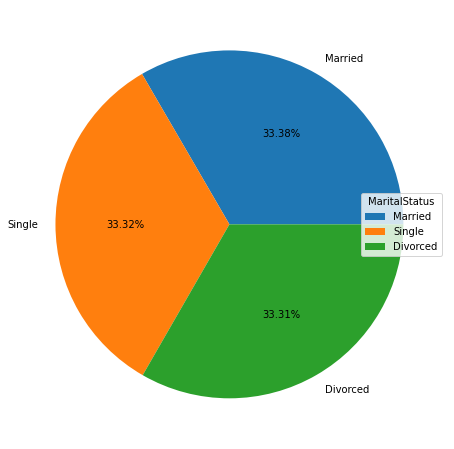

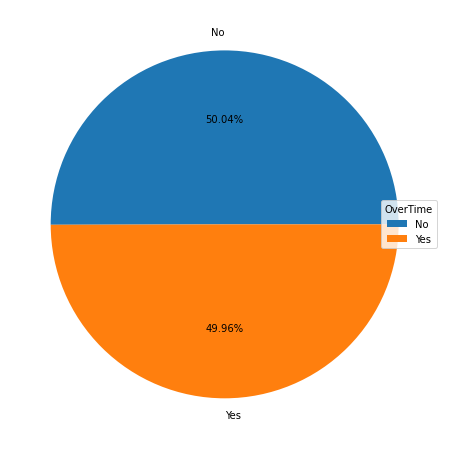

In [30]:
for col in df.columns:
    if df[col].dtypes=='object':
        plt.figure(figsize=(8,8))
        plt.pie(df[col].value_counts(),labels=df[col].unique(),data=df,autopct='%1.2f%%')
        plt.legend(title=col,loc=5)
        plt.show()


In [10]:
l=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany',
     'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','PercentSalaryHike']

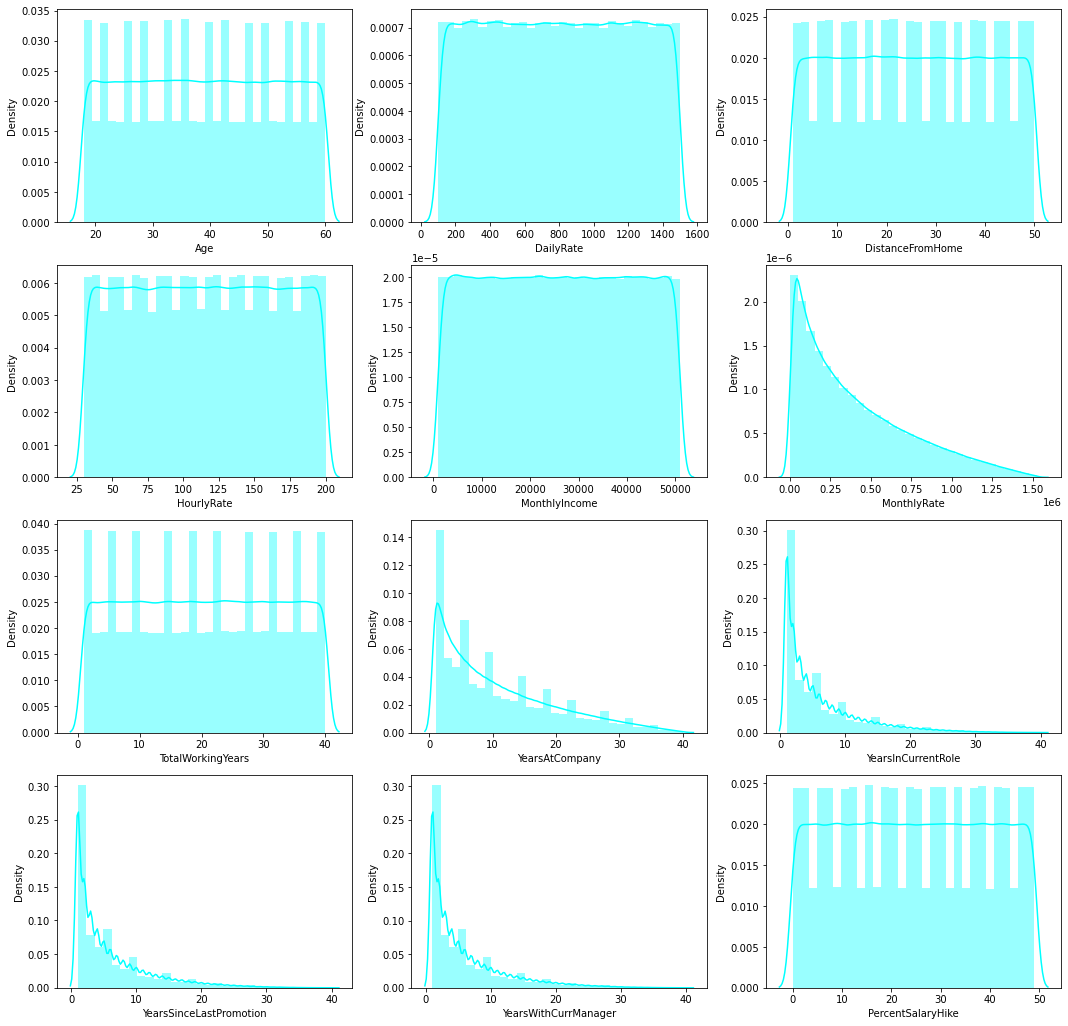

In [15]:
plt.figure(figsize = (18,18))
for i in range(len(l)):
    plt.subplot(4,3, i+1)
    sns.distplot(kde=True,color='cyan',bins=30,x = df[l[i]],axlabel=df[l].columns[i])
    plt.xlable=df[l].columns[i]

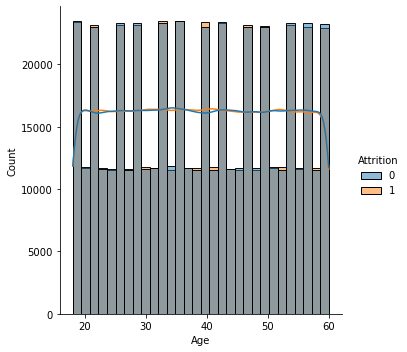

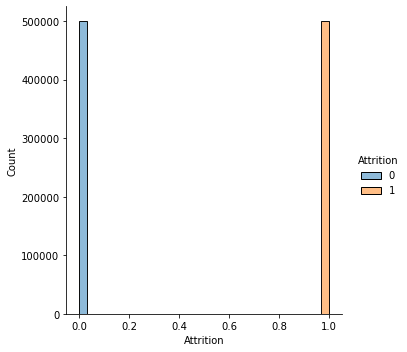

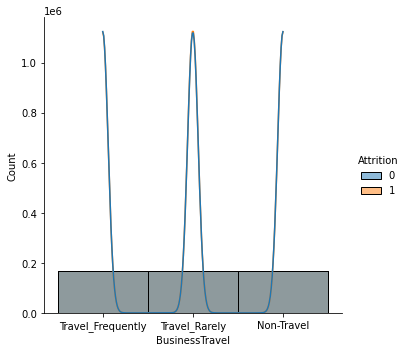

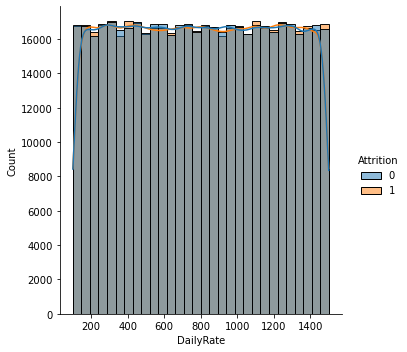

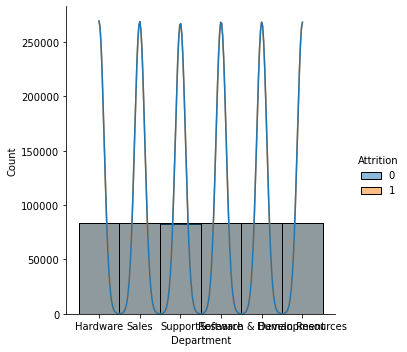

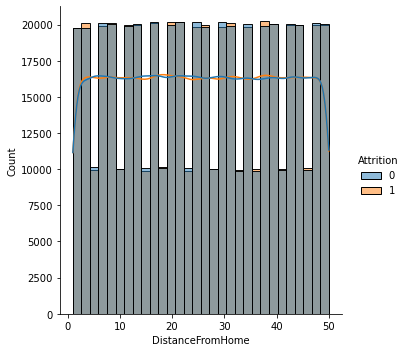

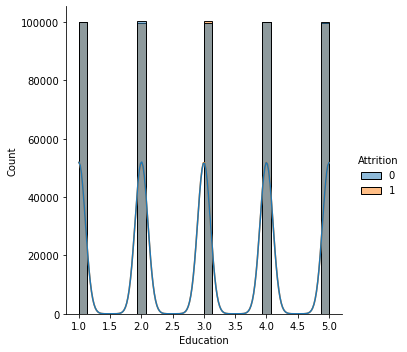

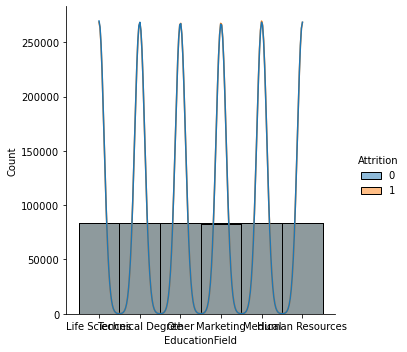

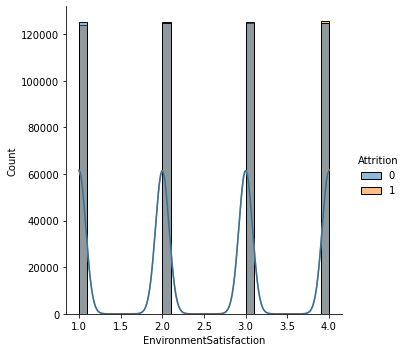

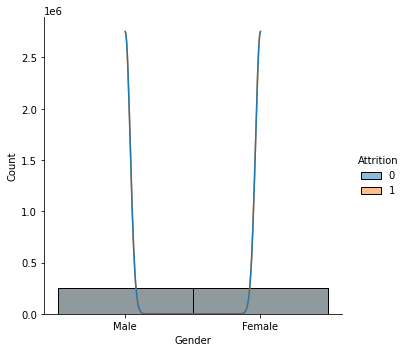

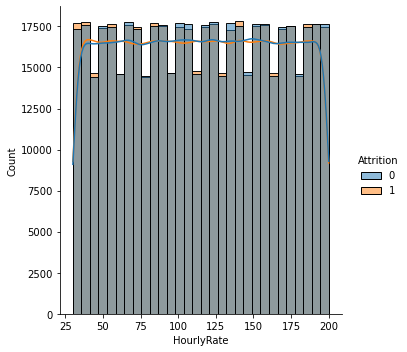

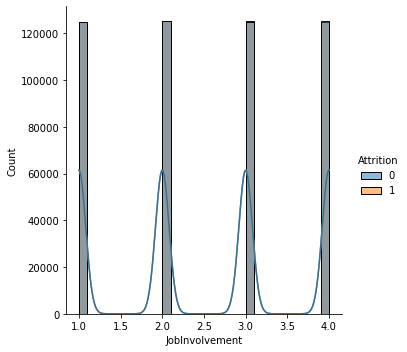

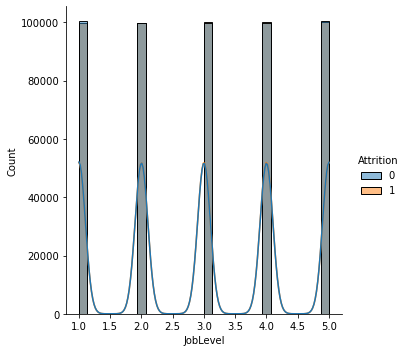

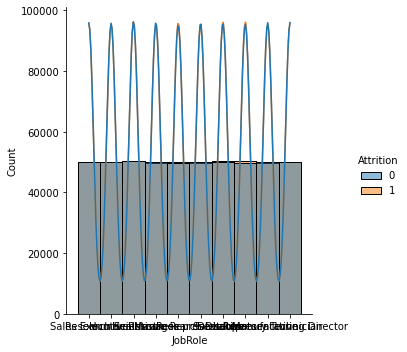

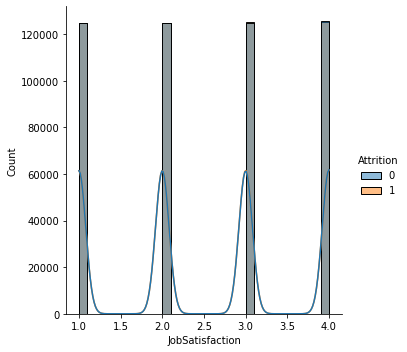

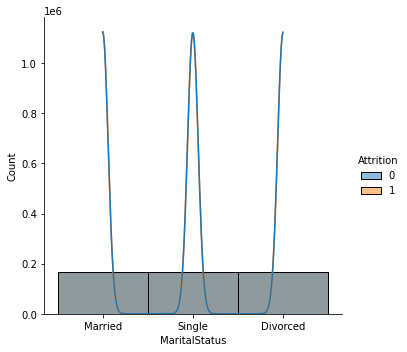

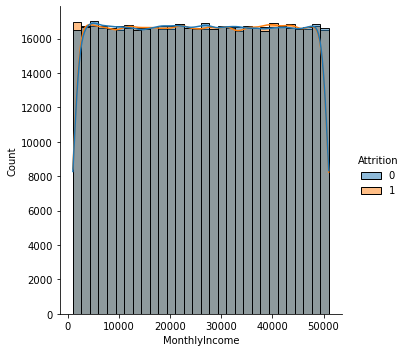

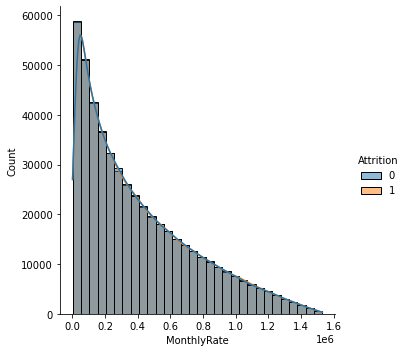

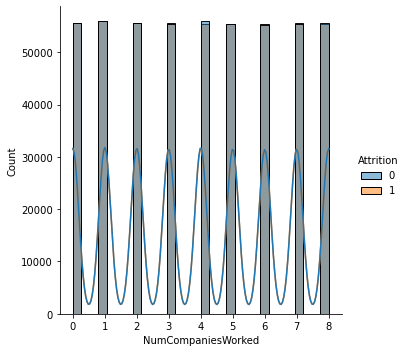

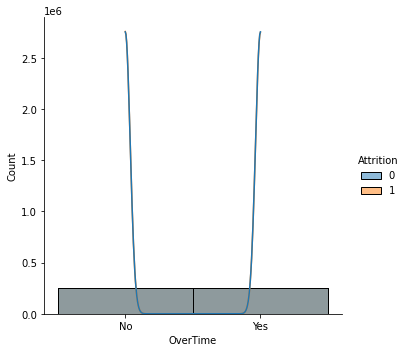

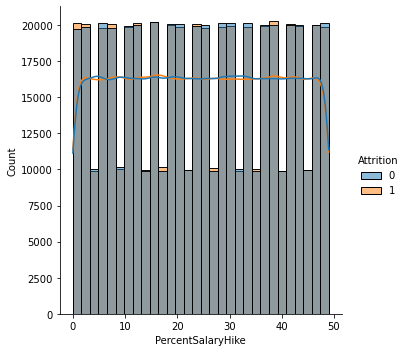

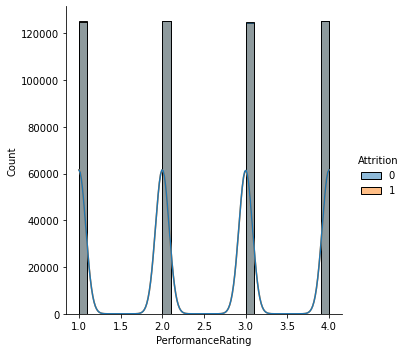

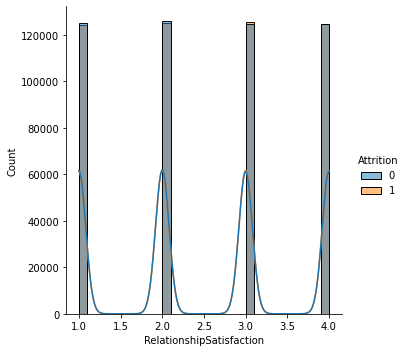

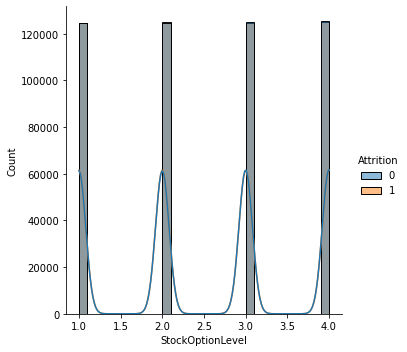

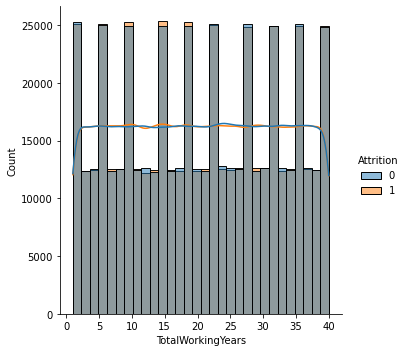

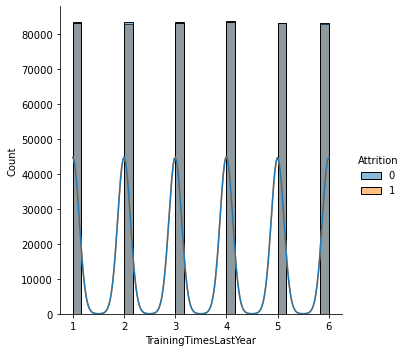

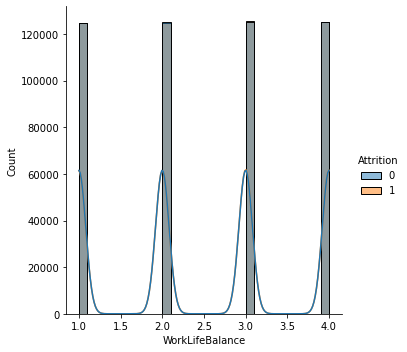

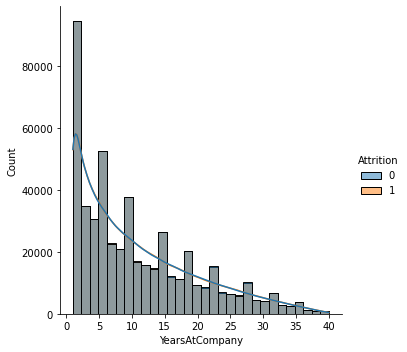

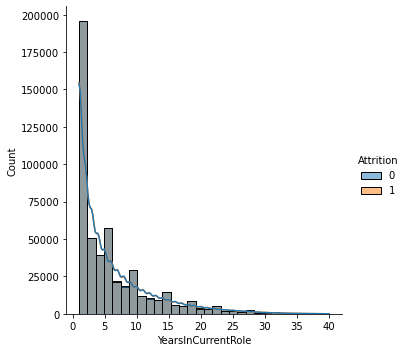

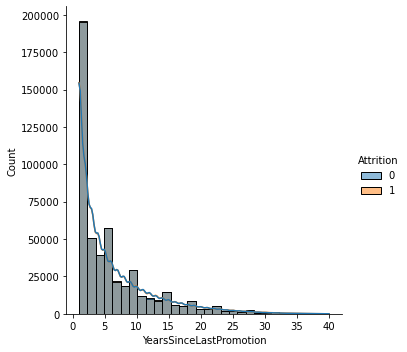

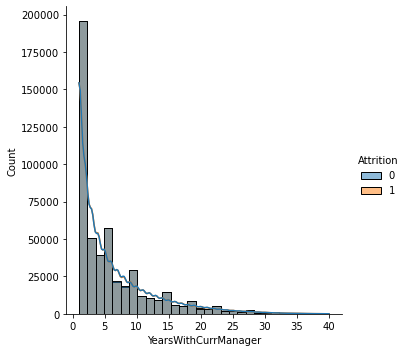

In [19]:
for i in df.columns:
    sns.displot(data=df,x=i,kde=True,color ='red', bins = 30,hue='Attrition')

### BIVARIATE ANALYSIS

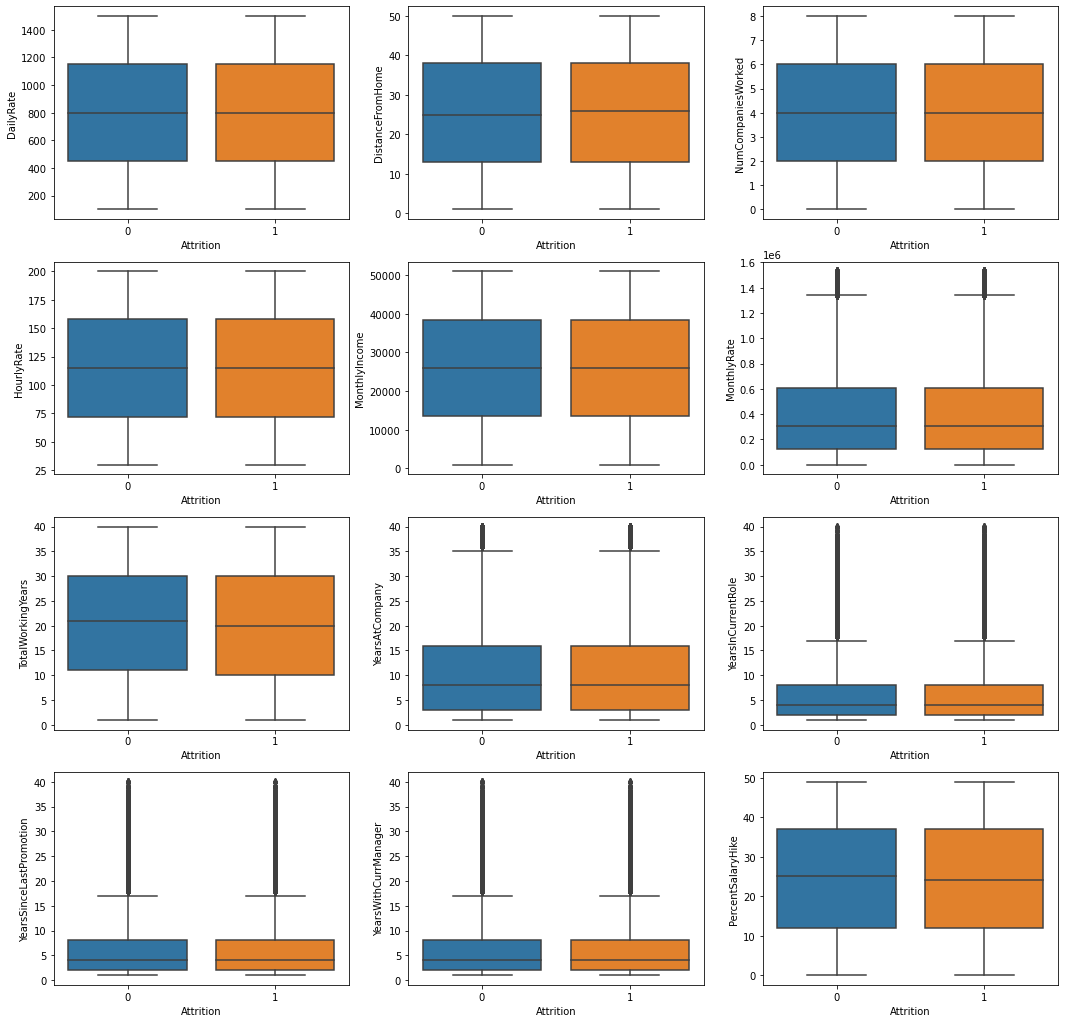

In [34]:
r = ['DailyRate','DistanceFromHome','NumCompaniesWorked','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','PercentSalaryHike']
plt.figure(figsize = (18,18))
for i in range(len(r)):
    plt.subplot(4,3, i+1)
    sns.boxplot(data = df, x='Attrition',y = df[r[i]])

<AxesSubplot:xlabel='Age', ylabel='YearsAtCompany'>

<Figure size 1440x1440 with 0 Axes>

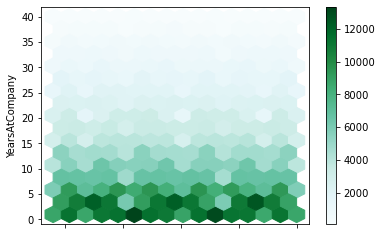

In [35]:
plt.figure(figsize=(20,20))
df.plot.hexbin(x = 'Age',y = "YearsAtCompany",gridsize = 15)

A hexbin plot is useful to represent the relationship of two numerical variables when you have a lot of data points. Without overlapping of the points, the plotting window is split into several hexbins. The color of each hexbin denotes the number of points in it.

<AxesSubplot:xlabel='MonthlyRate', ylabel='YearsAtCompany'>

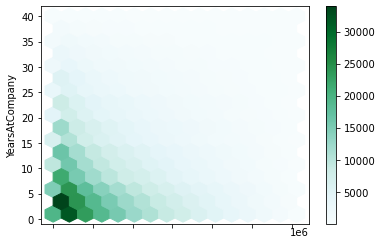

In [36]:
df.plot.hexbin(x = 'MonthlyRate',y = "YearsAtCompany",gridsize = 15)

<AxesSubplot:xlabel='MonthlyRate', ylabel='YearsSinceLastPromotion'>

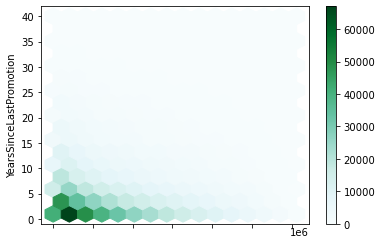

In [37]:
df.plot.hexbin(x="MonthlyRate", y="YearsSinceLastPromotion", gridsize=15)

In [38]:
for column in df.columns:
    if df[column].dtypes=='object':
        display(pd.crosstab(df[column],df.Attrition))

Attrition,0,1
BusinessTravel,,
Non-Travel,166774,166431
Travel_Frequently,166801,166221
Travel_Rarely,166506,167267


Attrition,0,1
Department,,
Hardware,83563,83527
Human Resources,83183,83237
Research & Development,83286,83393
Sales,83469,83274
Software,83453,83521
Support,83127,82967


Attrition,0,1
EducationField,,
Human Resources,83346,83216
Life Sciences,83681,83319
Marketing,83047,83232
Medical,83416,83678
Other,83202,83229
Technical Degree,83389,83245


Attrition,0,1
Gender,,
Female,250024,250049
Male,250057,249870


Attrition,0,1
JobRole,,
Developer,49956,50238
Healthcare Representative,49752,50129
Human Resources,50246,50257
Laboratory Technician,50083,49780
Manager,50104,49699
Manufacturing Director,50061,50049
Research Director,50049,49727
Research Scientist,49975,49866
Sales Executive,50011,49975


Attrition,0,1
MaritalStatus,,
Divorced,166631,166419
Married,166666,167113
Single,166784,166387


Attrition,0,1
OverTime,,
No,250028,250359
Yes,250053,249560


# Multivariate analysis

## Plotting correlation heatmap

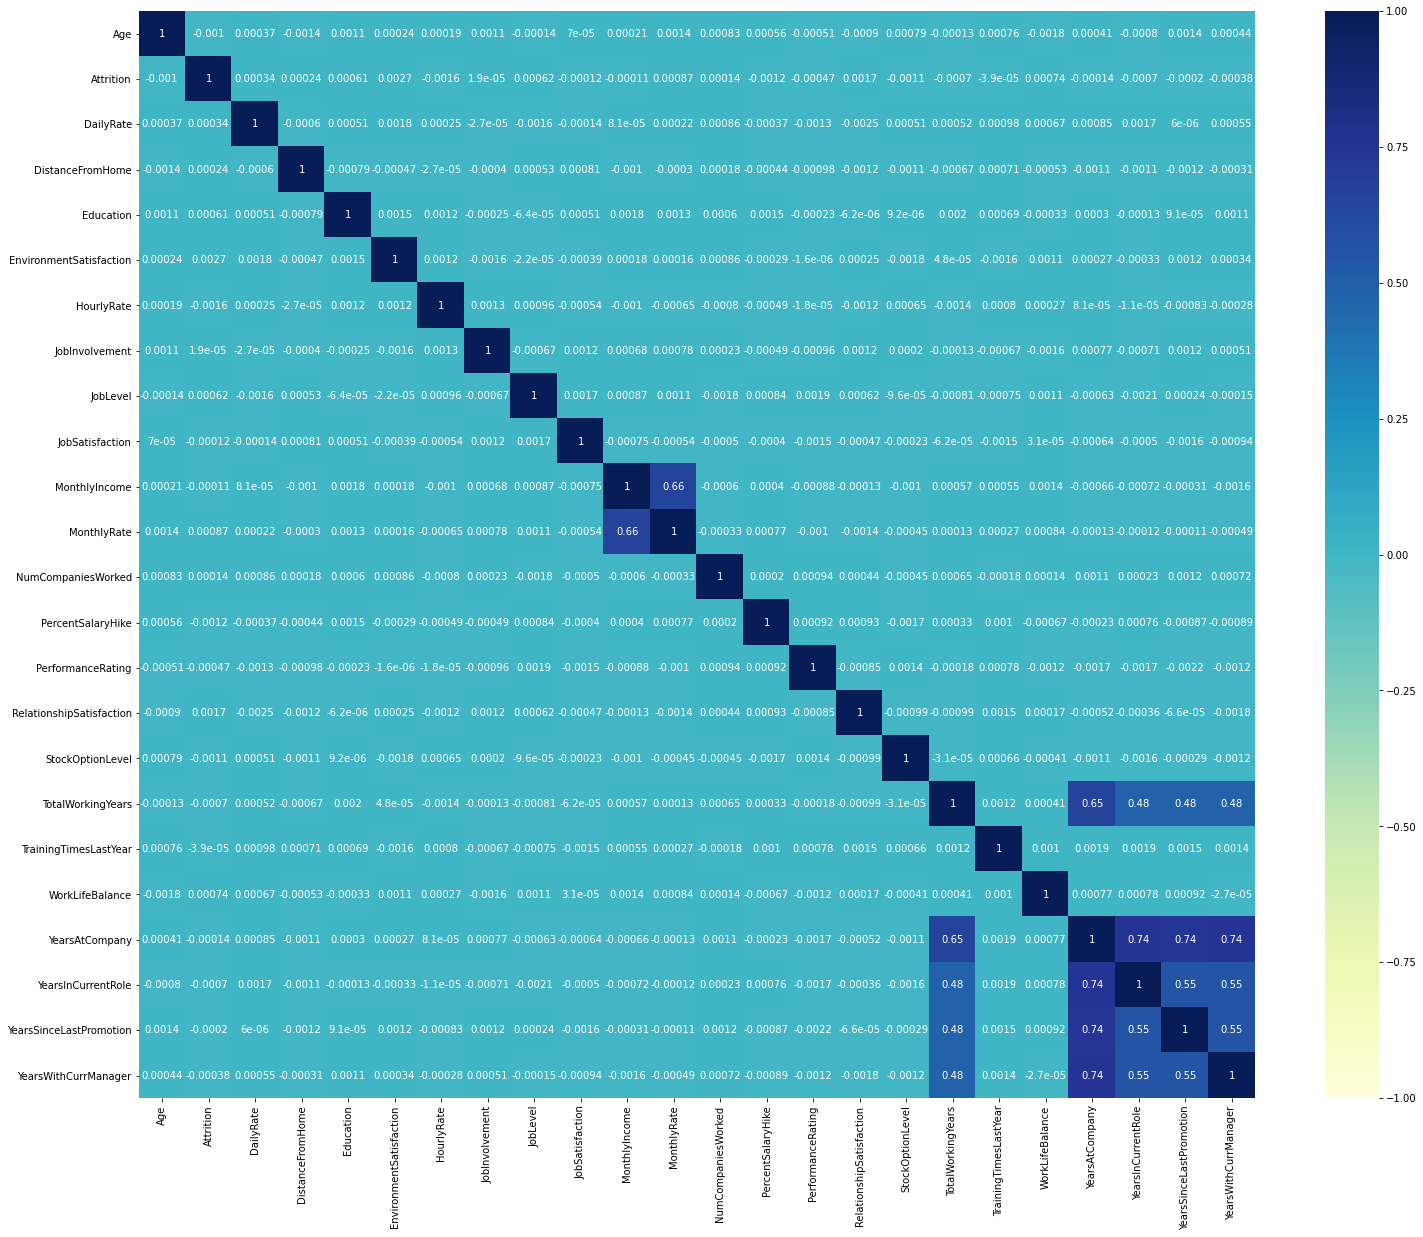

In [39]:
plt.figure(figsize=(25,20))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,vmin =-1,vmax =1)
  
# displaying heatmap
plt.show()

In [40]:
df.shape

(1000000, 31)

In [41]:
#df.to_csv("employee_eda.csv",index=False)